In [22]:
%%html
<style>
/* Any CSS style can go in here. */
.dataframe th {
    font-size: 8px;
}
.dataframe td {
    font-size: 8px;
}
</style>

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import polars as pl

sns.set(style="darkgrid", palette="Set2")

In [114]:
meta = pd.read_csv("external_data/PRECISE2_metadata.tsv", sep="\t")

In [115]:
df = pd.read_csv("external_data/PRECISE2_counts.csv")
df

,Geneid,ecoli_00178,ecoli_00188,ecoli_00825,ecoli_00057,ecoli_00471,ecoli_00215,ecoli_00270,ecoli_00100,ecoli_00019,...,ecoli_00393,ecoli_00800,ecoli_00195,ecoli_00265,ecoli_00037,ecoli_00419,ecoli_00567,ecoli_00784,ecoli_00544,ecoli_00338
0,b0001,1033,64,1079,464,19,1515,52,761,13,...,258,435,363,372,5,238,677,101,48,385
1,b0002,4831,47376,29852,4125,715,36396,13114,15639,3164,...,16736,6609,34432,22045,7387,25654,32192,19660,1827,56611
2,b0003,1216,14035,8113,1467,595,11199,5566,4338,1692,...,4794,2414,10421,5903,2445,7398,7113,4766,719,16584
3,b0004,1201,18761,10339,1528,658,14476,8043,5340,1342,...,7401,2257,13940,6350,2886,12073,9795,7853,821,20620
4,b0005,77,250,161,42,161,315,270,304,53,...,233,69,315,101,34,348,424,295,98,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4350,b4399,212,336,127,121,66,274,86,119,206,...,128,87,255,205,110,254,156,154,74,258
4351,b4400,90,141,48,51,14,108,43,29,83,...,44,45,101,112,30,44,130,16,50,90
4352,b4401,9583,12507,4117,1780,6416,7860,5796,1985,15762,...,3837,2234,4180,10014,5686,3679,5409,4864,4090,3605
4353,b4402,18,4,16,15,16,17,25,15,3,...,18,7,13,25,5,10,71,7,26,15


In [116]:
experiments_anaero = meta[meta["study"] == "ICA"].loc[:, ["Experiment", "condition_id"]]
experiments_anaero

exp_ids = list(experiments_anaero.loc[:, "Experiment"])
exp_cond = list(experiments_anaero.loc[:, "condition_id"])

In [117]:
output = df.loc[df["Geneid"] == "b3349", exp_ids]

output.columns = exp_cond

output.transpose()

,3324
wt_glc,10739
wt_glc,9823
wt_glc,11001
wt_glc,6425
arg_sbt,5154
arg_sbt,6300
cytd_rib,6924
cytd_rib,6962
gth,8355
gth,12161


# Check environments with hydrogenase activation

In [118]:
goi = ["b097"+str(i) for i in np.arange(2,8)] + ["b24"+str(i) for i in np.arange(81,93)] + ["b27"+str(i) for i in np.arange(17,26)] + ["b299"+str(i) for i in np.arange(0,8)]

goi

['b0972',
 'b0973',
 'b0974',
 'b0975',
 'b0976',
 'b0977',
 'b2481',
 'b2482',
 'b2483',
 'b2484',
 'b2485',
 'b2486',
 'b2487',
 'b2488',
 'b2489',
 'b2490',
 'b2491',
 'b2492',
 'b2717',
 'b2718',
 'b2719',
 'b2720',
 'b2721',
 'b2722',
 'b2723',
 'b2724',
 'b2725',
 'b2990',
 'b2991',
 'b2992',
 'b2993',
 'b2994',
 'b2995',
 'b2996',
 'b2997']

In [119]:
hydrogenase_expr = df.loc[df["Geneid"].isin(goi), :]
hydrogenase_expr = hydrogenase_expr.set_index("Geneid").transpose()
hydrogenase_expr.sort_values("b2995").tail(40)

Geneid,b0972,b0973,b0974,b0975,b0976,b0977,b2481,b2482,b2483,b2484,...,b2724,b2725,b2990,b2991,b2992,b2993,b2994,b2995,b2996,b2997
ecoli_00214,80,128,75,75,40,94,1,47,3,12,...,7,9,180,107,249,556,1791,865,2660,3247
ecoli_00334,81,103,48,57,21,57,5,18,5,11,...,4,5,118,165,570,843,3641,903,1073,1298
ecoli_00315,22,29,19,25,6,27,4,30,9,13,...,14,27,76,80,214,431,1325,904,1804,2993
ecoli_00213,75,183,68,79,40,82,2,26,1,4,...,7,5,202,191,391,867,2374,993,2469,3668
ecoli_00318,30,72,29,26,25,34,2,28,2,6,...,13,21,101,97,300,503,1523,1005,2069,3671
ecoli_00503,19,36,8,22,10,21,3,12,3,7,...,1,3,158,126,478,601,3430,1013,1369,2147
ecoli_00488,25,24,8,16,5,12,1,7,0,2,...,1,0,121,127,435,604,3719,1091,1612,2517
ecoli_00075,37,117,46,32,27,44,0,25,6,6,...,5,4,91,72,337,390,1834,1103,1765,3137
ecoli_00225,49,173,54,65,34,73,0,41,3,12,...,6,2,146,174,424,899,2184,1137,2156,3366
ecoli_00475,121,134,46,41,15,48,1,22,2,8,...,3,2,77,112,658,893,3930,1141,1228,1669


In [120]:
meta.loc[meta["Experiment"]=="ecoli_00213"].transpose()

,204
Experiment,ecoli_00213
sample_id,ytf__delybaO__1
study,yTF
project_id,ytf
condition_id,delybaO
rep_id,1
contact,Ye Gao
creator,Ye Gao
run_date,10/2/17
Strain Description,Escherichia coli K-12 MG1655 del_ybaO


In [121]:
goi_formate = ["b389"+str(i) for i in np.arange(1,5)] + ["b147"+str(i) for i in np.arange(4,7)] + ["b4079"]

goi_formate

['b3891', 'b3892', 'b3893', 'b3894', 'b1474', 'b1475', 'b1476', 'b4079']

In [122]:
formate_expr = df.loc[df["Geneid"].isin(goi_formate), :]
formate_expr = formate_expr.set_index("Geneid").transpose()
formate_expr.sort_values("b4079").tail(40)

Geneid,b1474,b1475,b1476,b3891,b3892,b3893,b3894,b4079
ecoli_00036,100,22,29,973,188,300,3762,1577
ecoli_00760,141,16,45,618,101,52,252,1610
ecoli_00460,680,68,60,1043,259,285,1660,1611
ecoli_00458,851,71,51,861,269,319,1990,1629
ecoli_00205,582,54,113,735,198,131,1226,1639
ecoli_00079,475,49,39,1056,334,229,1997,1640
ecoli_00457,814,67,63,1036,286,333,2008,1647
ecoli_00556,220,69,94,875,260,353,4244,1648
ecoli_00310,431,42,55,818,186,135,671,1667
ecoli_00150,91,20,29,647,207,37,276,1679


In [123]:
meta.loc[meta["Experiment"]=="ecoli_00477"].transpose()

,468
Experiment,ecoli_00477
sample_id,tcs__del_cusR_lb__1
study,Two Component Systems
project_id,tcs
condition_id,del_cusR_lb
rep_id,1
contact,Katherine Decker
creator,Julia Kleinmanns
run_date,6/27/19
Strain Description,Escherichia coli K-12 MG1655 del_cusR


/Users/cyrus/.pyenv/versions/viv-10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 3.496788194444436, 'Methionine synthase')

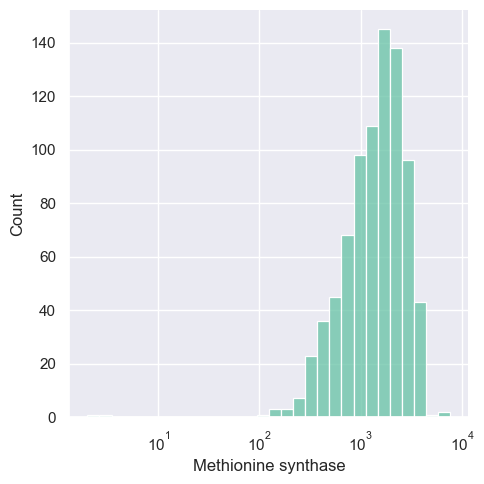

In [124]:
gene = "b0434"

random_expr = df.set_index("Geneid").transpose()
random_expr.loc[:, gene].sort_values().tail(40)

sns.displot(random_expr.loc[:, gene] + 1, log_scale=[10, False], bins=30)
plt.xlabel("Methionine synthase")

(0.0, 4500.0)

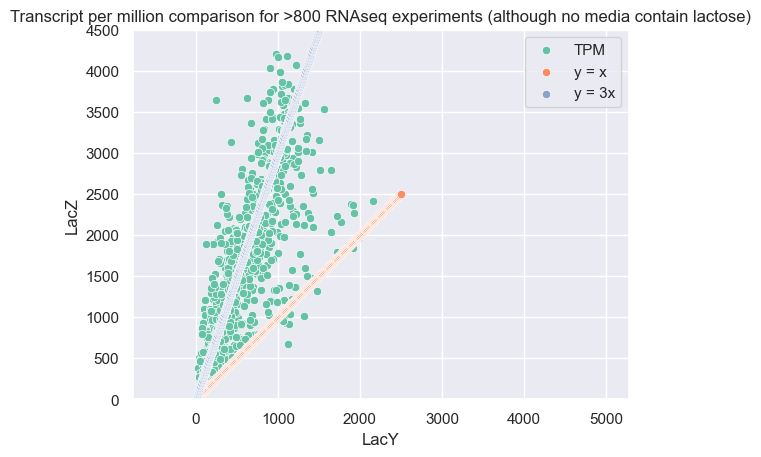

In [160]:
gene1 = "b0433"
gene2 = "b0434"

random_expr = df.set_index("Geneid").transpose()

sns.scatterplot(x=random_expr.loc[:, gene1] + 1, y=random_expr.loc[:, gene2], label="TPM")
sns.scatterplot(x = np.linspace(0, 2500, 1000), y = np.linspace(0, 2500, 1000), label="y = x")
sns.scatterplot(x = np.linspace(0, 2500, 1000), y = np.linspace(0, 7500, 1000), label="y = 3x")
plt.xlabel("LacY")
plt.ylabel("LacZ")
plt.title("Transcript per million comparison for >800 RNAseq experiments (although no media contain lactose)")
plt.axis('equal')
plt.xlim(0, 4500)
plt.ylim(0, 4500)



In [156]:
gene = "b0433"

random_expr = df.set_index("Geneid").transpose()
random_expr = random_expr.loc[:, gene].sort_values().tail(40)

head_exp=list(random_expr.index)

cols = ['Experiment', 'study', 'condition_id', 'rep_id', 'creator', 'run_date', 'Strain Description', 
 'Base Media', 'Carbon Source (g/L)', 'Nitrogen Source (g/L)', 'Electron Acceptor', 'Trace Element Mixture', 
 'Supplement', 'Temperature (C)', 'pH', 'Growth Rate (1/hr)']

meta_cur = meta.loc[meta["Experiment"].isin(head_exp)].loc[:, cols]

expr_df = meta_cur.join(random_expr, on='Experiment', how='inner')
expr_cols = expr_df.columns.tolist()
expr_cols =  expr_cols[-1:] + expr_cols[:-1]

expr_df = expr_df[expr_cols]

expr_df.head(5)

cols = ['Experiment', 'study', 'condition_id', 'rep_id', 'creator', 'run_date', 'Strain Description', 
 'Base Media', 'Carbon Source (g/L)', 'Nitrogen Source (g/L)', 'Electron Acceptor', 'Trace Element Mixture', 
 'Supplement', 'Temperature (C)', 'pH', 'Growth Rate (1/hr)']

# meta_cur = meta.loc[meta["Experiment"].isin(head_exp)].loc[:, cols]

random_expr = df.set_index("Geneid").transpose()
random_expr = random_expr.loc[:, gene].sort_values().tail(40)

meta_cur.join(random_expr, on='Experiment').sort_values(by=gene)

,Experiment,study,condition_id,rep_id,creator,run_date,Strain Description,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),Electron Acceptor,Trace Element Mixture,Supplement,Temperature (C),pH,Growth Rate (1/hr),b0433
418,ecoli_00427,HOT ALE,hot_ale9_mid_37c,1,Ke Chen,9/27/18,Escherichia coli HOT_mutL.9.200.1,M9,glucose(4),NH4Cl(1),O2,sauer trace element mixture,NaN,37,7.0,0.984850,1247
610,ecoli_00619,ROS TALE,ALE4_0pq,2,Justin Tan,11/28/17,Escherichia Coli ERS.ALE4,M9,glucose(4),NH4Cl(1),O2,NaN,NaN,37,7.0,NaN,1250
787,ecoli_00796,pH ALE,gmos_pH5,2,Richard Szubin,NaN,NaN,M9,glucose(4),NH4Cl(1),O2,NaN,NaN,37,5.5,NaN,1263
160,ecoli_00169,ICA,wt_glc,1,Ying Hefner,12/10/17,Escherichia coli K-12 MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,NaN,37,7.0,0.580000,1268
161,ecoli_00170,ICA,wt_glc,2,Ying Hefner,12/10/17,Escherichia coli K-12 MG1655,M9,glucose(2),NH4Cl(1),O2,sauer trace element mixture,NaN,37,7.0,0.580000,1270
506,ecoli_00515,Two Component Systems,wt_zncl2,1,Julia Kleinmanns,9/23/19,Escherichia coli K-12 MG1655,LB,NaN,NaN,O2,NaN,ZnCl2(1mM),37,7.0,NaN,1281
781,ecoli_00790,pH ALE,MES_ale_pH7,2,Richard Szubin,NaN,NaN,M9,glucose(4),NH4Cl(1),O2,NaN,NaN,37,7.0,NaN,1305
773,ecoli_00782,pH ALE,acid_ale2_pH7,2,Richard Szubin,NaN,NaN,M9,glucose(4),NH4Cl(1),O2,NaN,NaN,37,7.0,NaN,1314
597,ecoli_00606,ROS TALE,25_111_0pq,1,Justin Tan,9/5/19,Escherichia Coli ERS.25.111,M9,glucose(4),NH4Cl(1),O2,NaN,NaN,37,7.0,NaN,1323
368,ecoli_00377,AntibiotICA,rpmi_trisulf,1,Julia Xu,7/8/19,Escherichia coli K-12 MG1655,RPMI+10%LB,NaN,NaN,O2,NaN,trimethoprim-sulfamethoxazole(16mg/mL),37,7.0,NaN,1332


# Check metal transporters

In [80]:
meta["study"].unique()

array(['Control', 'Fur', 'Acid', 'Oxidative', 'Nac/NtrC', 'Misc', 'Omics',
       'OmpR', 'MinSpan', 'Cra/Crp', 'RpoB Knock-in', 'Crp ARs',
       'Glucose Evolution', '42C Evolution',
       'Substrate-switching Evolution', 'ICA', 'yTF', 'False Positives',
       'Enzyme Promiscuity', 'Pseudogene Repair', 'Miscellaneous #2',
       'Naphthoquinone', 'Respiratory quinone', 'OxyR ALE', 'SvNS PGI',
       'AntibiotICA', 'HOT ALE', 'pdhR-ALE', 'Two Component Systems',
       'ROS TALE', 'pColi', 'CCK', 'CCK_pgi', 'CCK_sdhCB', 'CCK_ptsHIcrr',
       'CCK_gnd', 'CCK_tpiA', 'pH ALE', 'adnB', 'yTF 2', 'yTF 3'],
      dtype=object)

In [85]:
meta[(meta["study"] == "Two Component Systems") & (meta["Strain Description"] == "Escherichia coli K-12 MG1655")]

,Experiment,sample_id,study,project_id,condition_id,rep_id,contact,creator,run_date,Strain Description,...,Sequencing Machine,Additional Details,Biological Replicates,DOI,GEO,Published,SRX,Run,LibraryLayout,Platform
486,ecoli_00495,tcs__wt_01-kcl__1,Two Component Systems,tcs,wt_01-kcl,1,Katherine Decker,Julia Kleinmanns,6/27/19,Escherichia coli K-12 MG1655,...,NaN,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA
487,ecoli_00496,tcs__wt_01-kcl__2,Two Component Systems,tcs,wt_01-kcl,2,Katherine Decker,Julia Kleinmanns,6/27/19,Escherichia coli K-12 MG1655,...,NaN,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA
488,ecoli_00497,tcs__wt_01xlb__1,Two Component Systems,tcs,wt_01xlb,1,Katherine Decker,Julia Kleinmanns,6/27/19,Escherichia coli K-12 MG1655,...,NaN,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA
489,ecoli_00498,tcs__wt_01xlb__2,Two Component Systems,tcs,wt_01xlb,2,Katherine Decker,Julia Kleinmanns,6/27/19,Escherichia coli K-12 MG1655,...,NaN,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA
490,ecoli_00499,tcs__wt_115-kcl__1,Two Component Systems,tcs,wt_115-kcl,1,Katherine Decker,Julia Kleinmanns,6/27/19,Escherichia coli K-12 MG1655,...,NaN,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA
491,ecoli_00500,tcs__wt_115-kcl__2,Two Component Systems,tcs,wt_115-kcl,2,Katherine Decker,Julia Kleinmanns,6/27/19,Escherichia coli K-12 MG1655,...,NaN,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA
492,ecoli_00501,tcs__wt_CuSO4__1,Two Component Systems,tcs,wt_CuSO4,1,Katherine Decker,Julia Kleinmanns,6/27/19,Escherichia coli K-12 MG1655,...,NaN,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA
493,ecoli_00502,tcs__wt_CuSO4__2,Two Component Systems,tcs,wt_CuSO4,2,Katherine Decker,Julia Kleinmanns,6/27/19,Escherichia coli K-12 MG1655,...,NaN,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA
494,ecoli_00503,tcs__wt_etoh__1,Two Component Systems,tcs,wt_etoh,1,Katherine Decker,Julia Kleinmanns,6/27/19,Escherichia coli K-12 MG1655,...,NaN,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA
495,ecoli_00504,tcs__wt_etoh__2,Two Component Systems,tcs,wt_etoh,2,Katherine Decker,Julia Kleinmanns,6/27/19,Escherichia coli K-12 MG1655,...,NaN,NaN,2,NaN,NaN,0.0,NaN,NaN,PAIRED,ILLUMINA


In [87]:
exp_sox = list(meta[meta["study"] == "Control"]["Experiment"]) + list(meta[meta["study"] == "Oxidative"]["Experiment"])
exp_sox

['ecoli_00001',
 'ecoli_00002',
 'ecoli_00019',
 'ecoli_00020',
 'ecoli_00021',
 'ecoli_00022',
 'ecoli_00023',
 'ecoli_00024',
 'ecoli_00025',
 'ecoli_00026']

In [92]:

goi = ["b3040", "b1973", "b1859", "b3915", "b2392", "b3469", "b3493", "b0752"]

cur_expr_df = df.set_index("Geneid").loc[goi, exp_sox]


cur_expr_df

,ecoli_00001,ecoli_00002,ecoli_00019,ecoli_00020,ecoli_00021,ecoli_00022,ecoli_00023,ecoli_00024,ecoli_00025,ecoli_00026
Geneid,,,,,,,,,,
b3040,345,240,1571,1770,1704,1910,1583,1682,2271,1636
b1973,23,17,44387,40725,77,94,41394,44516,234,171
b1859,122,49,692,716,158,183,491,550,177,140
b3915,625,473,1095,1088,1039,1059,751,873,1279,927
b2392,390,316,11716,9145,2567,2587,7229,8831,11167,7630
b3469,290,247,215,245,627,654,203,195,324,246
b3493,1114,760,590,598,654,828,425,512,607,392
b0752,192,120,695,844,851,1029,507,594,798,609


# Li 2014

In [17]:
li = pl.read_csv("external_data/Li_2014_profiling.csv")
li.head(5)

Gene,MOPS complete,MOPS minimal,MOPS complete without methionine
str,i64,i64,i64
"""aaeA""",62,5,21
"""aaeB""",16,2,0
"""aaeR""",203,79,141
"""aaeX""",28,5,11
"""aas""",188,80,162


In [18]:
li = li.with_columns( ( (pl.col("MOPS complete without methionine") + 10) / (10 + pl.col("MOPS complete"))).alias("dropout FC") )
li = li.with_columns( ( (pl.col("MOPS minimal") + 10) / (10 + pl.col("MOPS complete"))).alias("minimal FC") )
li.head(5)

Gene,MOPS complete,MOPS minimal,MOPS complete without methionine,dropout FC,minimal FC
str,i64,i64,i64,f64,f64
"""aaeA""",62,5,21,0.430556,0.208333
"""aaeB""",16,2,0,0.384615,0.461538
"""aaeR""",203,79,141,0.70892,0.41784
"""aaeX""",28,5,11,0.552632,0.394737
"""aas""",188,80,162,0.868687,0.454545


In [19]:
li.sort("dropout FC").tail(20)

Gene,MOPS complete,MOPS minimal,MOPS complete without methionine,dropout FC,minimal FC
str,i64,i64,i64,f64,f64
"""ybdL""",105,278,5802,50.53913,2.504348
"""mmuP""",39,64,2791,57.163265,1.510204
"""yciW""",10,490,1223,61.65,25.0
"""cysW""",4,308,936,67.571429,22.714286
"""cysU""",4,419,1488,107.0,30.642857
"""metF""",192,2849,24854,123.089109,14.153465
"""cysH""",29,1579,5175,132.948718,40.74359
"""zinT""",360,20357,50070,135.351351,55.045946
"""cysA""",36,2214,7403,161.152174,48.347826


In [20]:
li.sum()

Gene,MOPS complete,MOPS minimal,MOPS complete without methionine,dropout FC,minimal FC
str,i64,i64,i64,f64,f64
null,18051444,5627623,10452920,9375.465686,6772.563954
